In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
#for visualization
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


In [3]:
question_two_df = pd.read_csv("Question1.csv", na_values='?')
question_two_df.columns = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"] # including the header

question_two_df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18.0,2,33.770,1,0.0,4,1725.55230
1,28.0,2,33.000,3,0.0,4,4449.46200
2,33.0,2,22.705,0,0.0,1,21984.47061
3,32.0,2,28.880,0,0.0,1,3866.85520
4,31.0,1,25.740,0,NaN,4,3756.62160


In [4]:
question_two_df.isna().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [5]:
question_two_df.describe()

,age,gender,bmi,no_of_children,smoker,region,charges
count,2767.000000,2771.000000,2771.000000,2771.000000,2764.000000,2771.000000,2771.000000
mean,39.117094,1.507398,30.702360,1.102129,0.203690,2.559726,13260.062289
std,14.088991,0.500036,6.130324,1.214845,0.402814,1.130934,12153.767132
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,26.000000,1.000000,26.220000,0.000000,0.000000,2.000000,4687.797000
50%,39.000000,2.000000,30.495000,1.000000,0.000000,3.000000,9304.701900
75%,51.000000,2.000000,34.770000,2.000000,0.000000,4.000000,16516.743675
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [6]:
question_two_df.dtypes

age               float64
gender              int64
bmi               float64
no_of_children      int64
smoker            float64
region              int64
charges           float64
dtype: object

<Figure size 640x480 with 0 Axes>

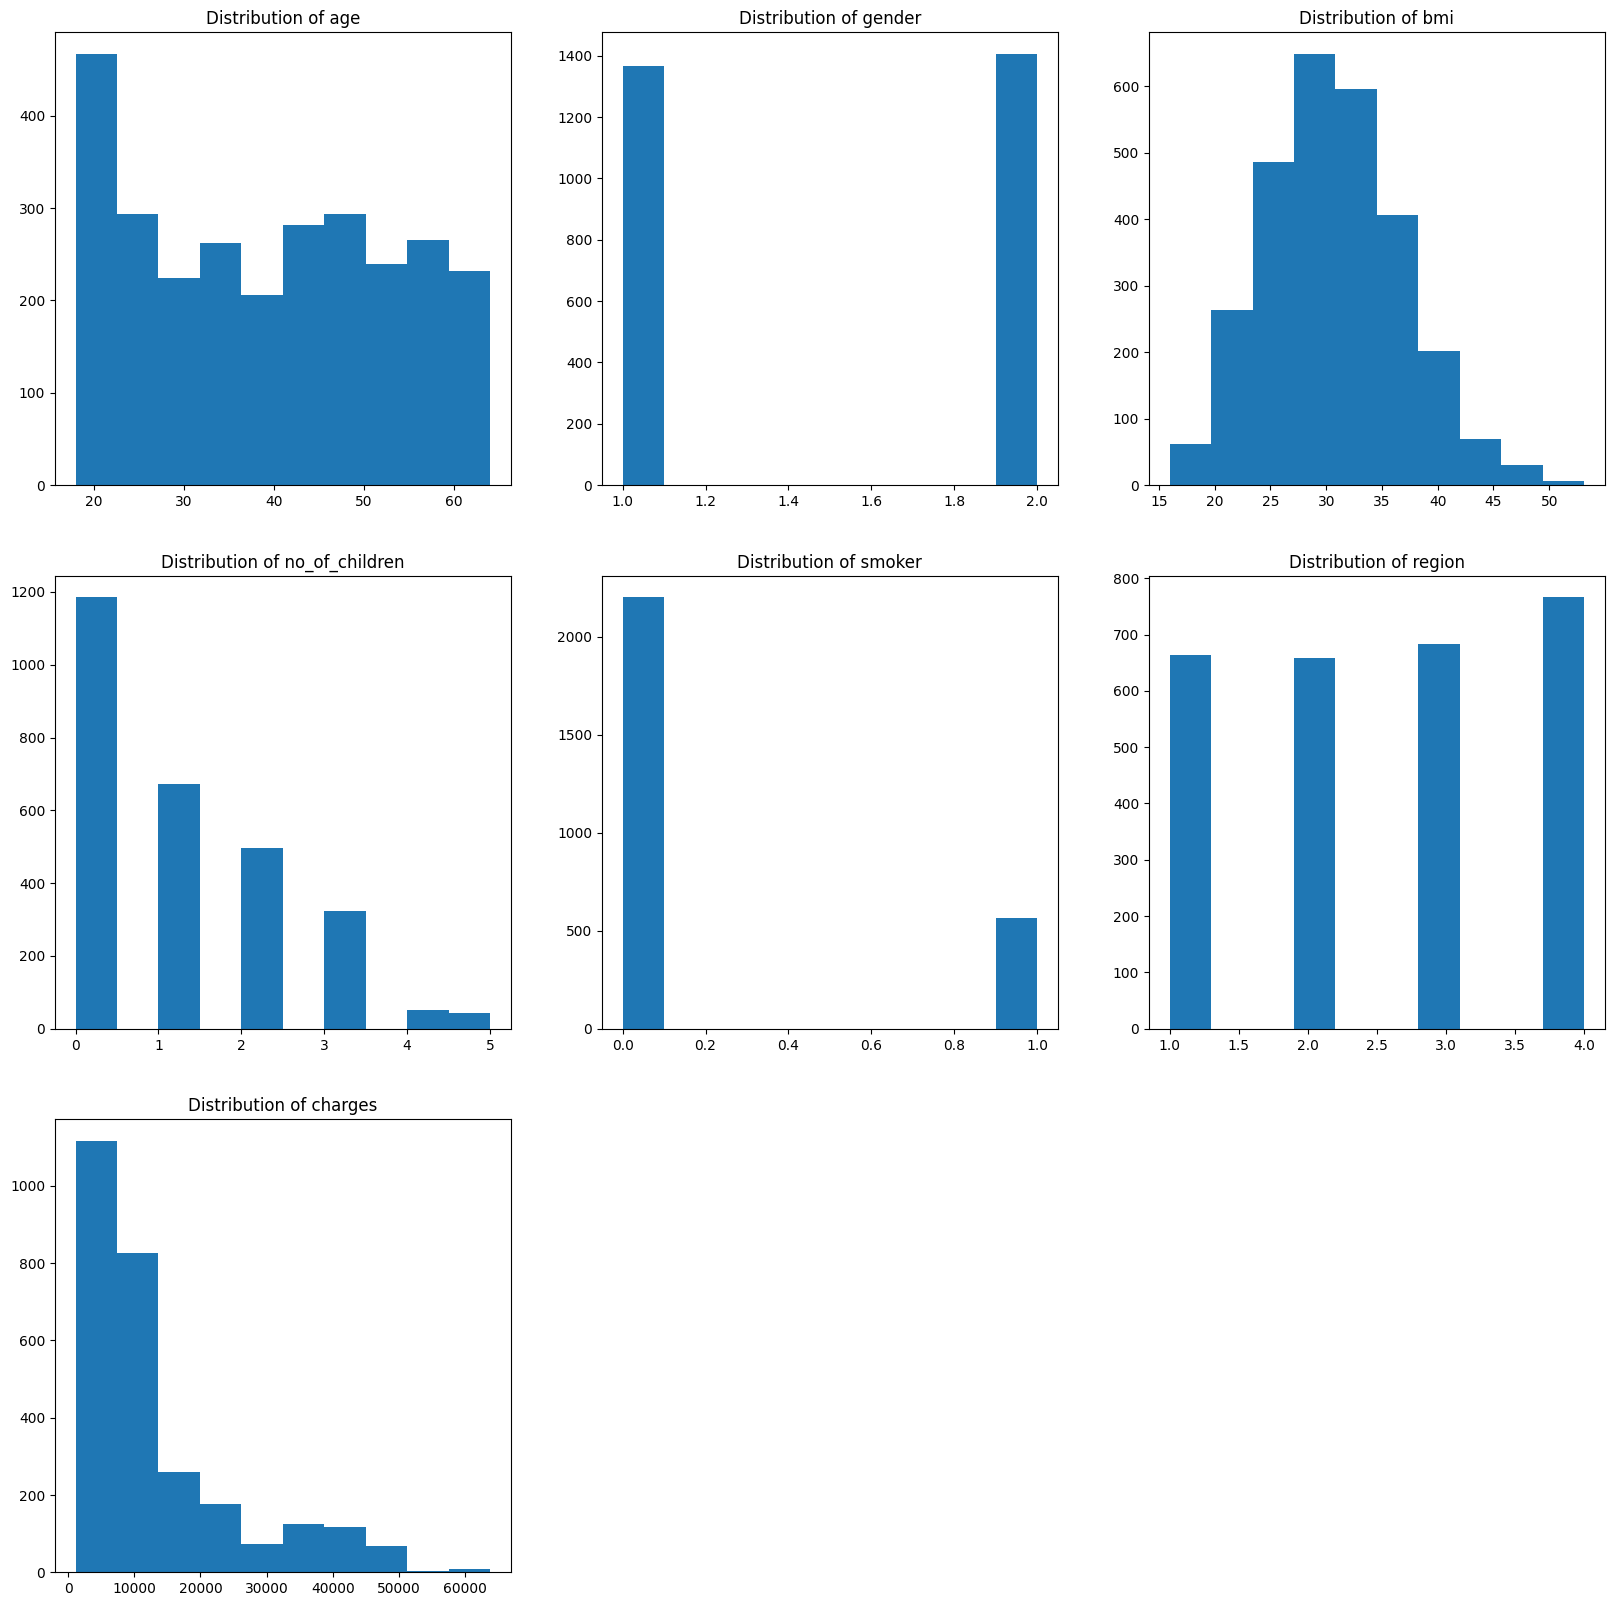

In [8]:
cont_data=question_two_df.select_dtypes(exclude='object')

def plothisto(cont_data):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(cont_data.columns):
        plt.subplot(3,3,i+1)
        plt.hist(question_two_df[col])
        plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

plothisto(cont_data)

In [10]:
question_two_df["age"]=question_two_df["age"].fillna(question_two_df["age"].median())

In [11]:
question_two_df["smoker"]=question_two_df["smoker"].fillna(question_two_df["smoker"].median())

Check again for missing values

In [13]:
question_two_df.isna().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

Change the datatypes

In [14]:
question_two_df["age"]=question_two_df["age"].astype('int')
question_two_df["smoker"]=question_two_df["smoker"].astype('int')

Check datatypes

In [15]:
question_two_df.dtypes

age                 int64
gender              int64
bmi               float64
no_of_children      int64
smoker              int64
region              int64
charges           float64
dtype: object

Rounding off 

In [19]:
# question_two_df["bmi"]=question_two_df["bmi"].round(decimals='2')
# question_two_df["charges"]=question_two_df["charges"].round(decimals='2')
question_two_df=question_two_df.round({'bmi':2,'charges':2})

In [20]:
question_two_df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.77,1,0,4,1725.55
1,28,2,33.00,3,0,4,4449.46
2,33,2,22.70,0,0,1,21984.47
3,32,2,28.88,0,0,1,3866.86
4,31,1,25.74,0,0,4,3756.62
5,46,1,33.44,1,0,4,8240.59
6,37,1,27.74,3,0,1,7281.51
7,37,2,29.83,2,0,2,6406.41
8,60,1,25.84,0,0,1,28923.14
9,25,2,26.22,0,0,2,2721.32


Check for outliers

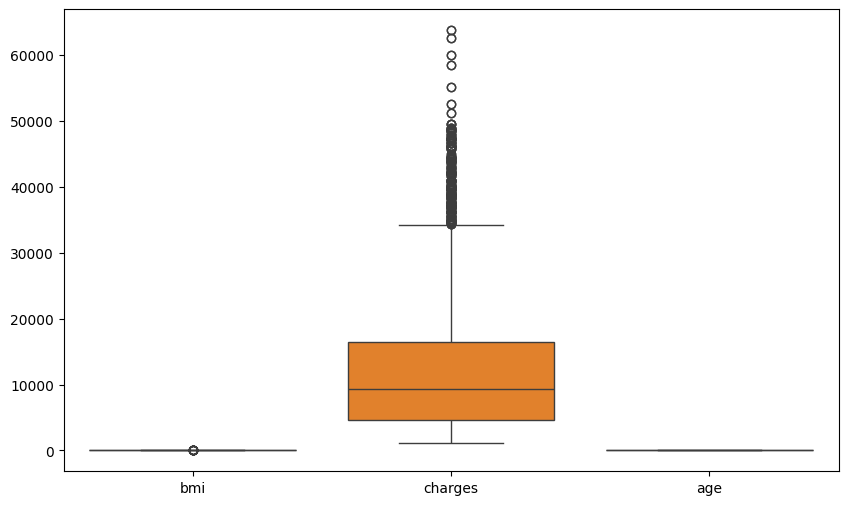

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=question_two_df[['bmi', 'charges', 'age']])  # Replace with relevant numerical columns
plt.show()


In [22]:
corr_matrix=question_two_df.corr()
corr_matrix

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112864,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042771,0.015693,0.083125,0.022360,0.062959
bmi,0.112864,0.042771,1.000000,-0.001638,0.011817,0.271172,0.199899
no_of_children,0.037126,0.015693,-0.001638,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011817,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271172,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199899,0.066551,0.789141,0.054018,1.000000


Correlation matrix

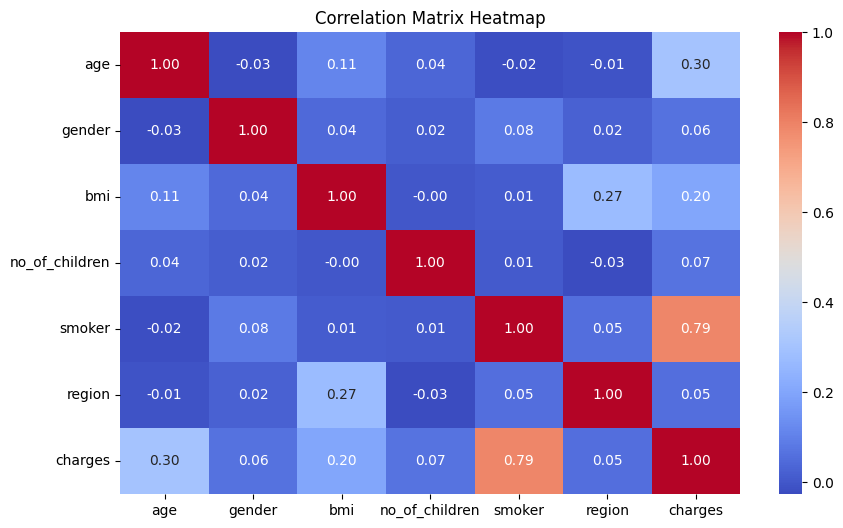

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

From above, we see that charges and smoker have a very high correlation.
Smoker and Bmi are the attributes that most affect the `charges`.


Regression plot of charges vs bmi

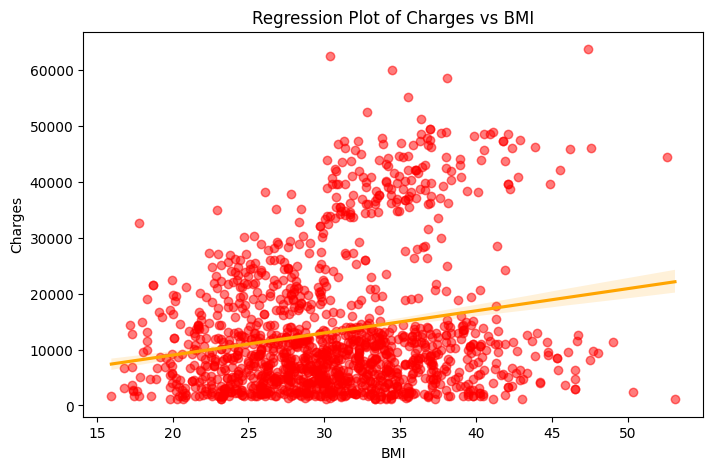

In [30]:
plt.figure(figsize=(8, 5))
sns.regplot(x="bmi", y="charges",color='red', data=question_two_df, scatter_kws={'alpha':0.3}, line_kws={"color": "orange"})
plt.title("Regression Plot of Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

Box plot

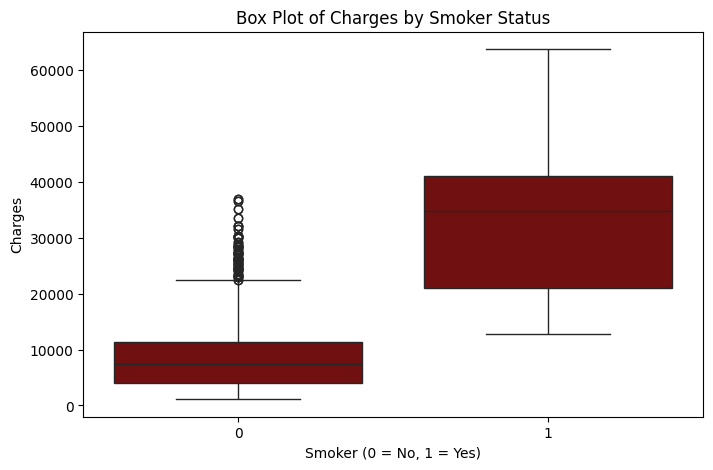

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="smoker", y="charges", color='maroon',data=question_two_df)
plt.title("Box Plot of Charges by Smoker Status")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Charges")
plt.show()

Save csv as name.

In [34]:

question_two_df.to_csv("Tirzah.csv", index=False)